In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
import seaborn as sns

In [2]:
# Load the CSV files
file1 = pd.read_csv(r"C:\Users\mdirf\Downloads\Logistic Regression\Logistic Regression\Titanic_test.csv")
file2 = pd.read_csv(r"C:\Users\mdirf\Downloads\Logistic Regression\Logistic Regression\Titanic_train.csv")

# Combine them
df = pd.concat([file1, file2], ignore_index=True)

# Optional: save the combined file
df.to_csv('combined.csv', index=False)

# Check the result
print(df)


      PassengerId  Pclass                                          Name  \
0             892       3                              Kelly, Mr. James   
1             893       3              Wilkes, Mrs. James (Ellen Needs)   
2             894       2                     Myles, Mr. Thomas Francis   
3             895       3                              Wirz, Mr. Albert   
4             896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)   
...           ...     ...                                           ...   
1304          887       2                         Montvila, Rev. Juozas   
1305          888       1                  Graham, Miss. Margaret Edith   
1306          889       3      Johnston, Miss. Catherine Helen "Carrie"   
1307          890       1                         Behr, Mr. Karl Howell   
1308          891       3                           Dooley, Mr. Patrick   

         Sex   Age  SibSp  Parch      Ticket     Fare Cabin Embarked  Survived  
0       male  34.5

Data exploration

In [3]:
# Examine the features
# Show first few rows
print(df.head())

# Get data types and missing values
print(df.info())

# Summary statistics for numeric columns
print(df.describe())

# Check missing values
print(df.isnull().sum())


   PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  Survived  
0  34.5      0      0   330911   7.8292   NaN        Q       NaN  
1  47.0      1      0   363272   7.0000   NaN        S       NaN  
2  62.0      0      0   240276   9.6875   NaN        Q       NaN  
3  27.0      0      0   315154   8.6625   NaN        S       NaN  
4  22.0      1      1  3101298  12.2875   NaN        S       NaN  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Colum

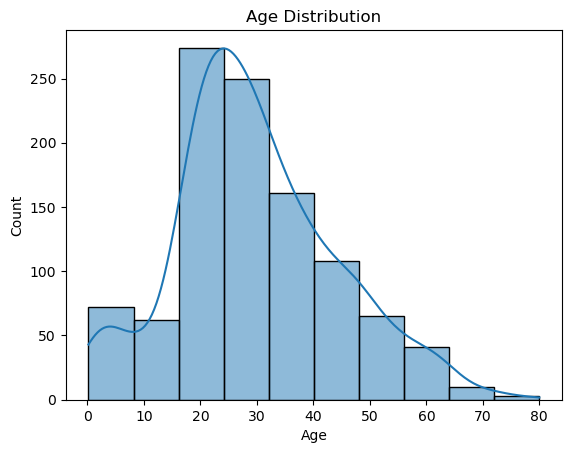

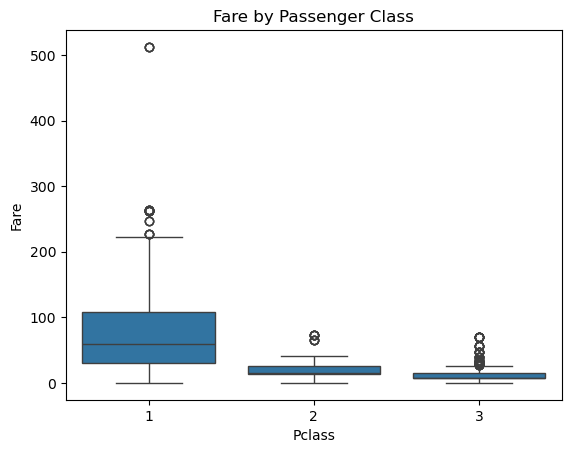

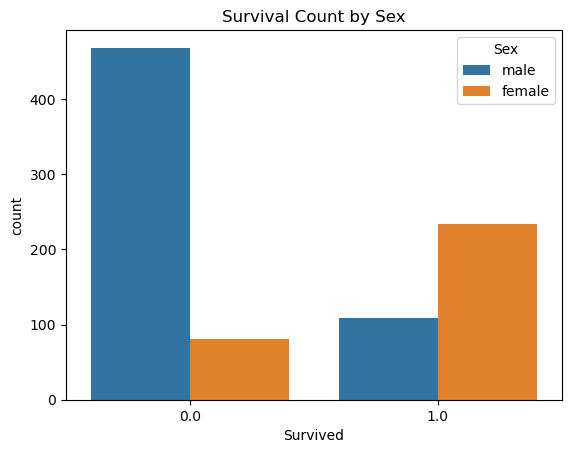

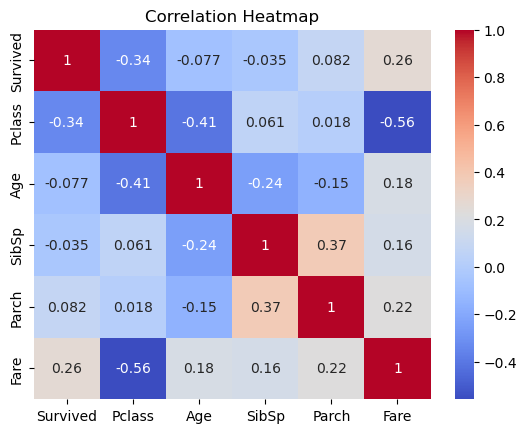

In [4]:
# Visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of Age
sns.histplot(df['Age'], bins=10, kde=True)
plt.title('Age Distribution')
plt.show()

# Box plot of Fare by Pclass
sns.boxplot(x='Pclass', y='Fare', data=df)
plt.title('Fare by Passenger Class')
plt.show()

# Countplot of Survivors by Sex
sns.countplot(x='Survived', hue='Sex', data=df)
plt.title('Survival Count by Sex')
plt.show()

# Correlation heatmap
numeric_cols = ['Survived','Pclass','Age','SibSp','Parch','Fare']
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


Data Preprocessing:

In [5]:
# Handle Missing value
df['Fare'].fillna(df['Fare'].median(), inplace=True)
if df['Age'].isnull().sum() > 0:
    df['Age'].fillna(df['Age'].median(), inplace=True)
if df['Embarked'].isnull().sum() > 0:
    df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
if 'Cabin' in df.columns:
    df.drop(columns='Cabin', inplace=True)
print(df.isnull().sum())

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
Survived       418
dtype: int64


C:\Users\mdirf\AppData\Local\Temp\ipykernel_18372\1268714825.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Fare'].fillna(df['Fare'].median(), inplace=True)
C:\Users\mdirf\AppData\Local\Temp\ipykernel_18372\1268714825.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For

In [6]:
# encode categorical variable
# Encode Sex: male=0, female=1
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

# One-hot encode Embarked (drop first to avoid dummy variable trap)
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

# Show first few rows
print(df)


      PassengerId  Pclass                                          Name  Sex  \
0             892       3                              Kelly, Mr. James    0   
1             893       3              Wilkes, Mrs. James (Ellen Needs)    1   
2             894       2                     Myles, Mr. Thomas Francis    0   
3             895       3                              Wirz, Mr. Albert    0   
4             896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)    1   
...           ...     ...                                           ...  ...   
1304          887       2                         Montvila, Rev. Juozas    0   
1305          888       1                  Graham, Miss. Margaret Edith    1   
1306          889       3      Johnston, Miss. Catherine Helen "Carrie"    1   
1307          890       1                         Behr, Mr. Karl Howell    0   
1308          891       3                           Dooley, Mr. Patrick    0   

       Age  SibSp  Parch      Ticket   

or

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
import seaborn as sns

In [8]:
test_data=pd.read_csv(r"C:\Users\mdirf\Downloads\Logistic Regression (1)\Logistic Regression\Titanic_test.csv")
print(test_data.isnull().sum())
print(test_data.duplicated().sum())

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64
0


In [9]:
test_data['Fare'].fillna(test_data['Fare'].median(), inplace=True)
if test_data['Age'].isnull().sum() > 0:
    test_data['Age'].fillna(test_data['Age'].median(), inplace=True)
if 'Cabin' in test_data.columns:
    test_data.drop(columns='Cabin', inplace=True)
print(test_data.isnull().sum())

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


C:\Users\mdirf\AppData\Local\Temp\ipykernel_18372\697178194.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_data['Fare'].fillna(test_data['Fare'].median(), inplace=True)
C:\Users\mdirf\AppData\Local\Temp\ipykernel_18372\697178194.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as 

In [10]:
train_data=pd.read_csv(r"C:\Users\mdirf\Downloads\Logistic Regression (1)\Logistic Regression\Titanic_train.csv")
print(train_data.isnull().sum())
print(train_data.duplicated().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
0


In [11]:
if train_data['Age'].isnull().sum() > 0:
    train_data['Age'].fillna(train_data['Age'].median(), inplace=True)
if 'Cabin' in train_data.columns:
    train_data.drop(columns='Cabin', inplace=True)
if train_data['Embarked'].isnull().sum() > 0:
    train_data['Embarked'].fillna(train_data['Embarked'].mode()[0], inplace=True)
print(train_data.isnull().sum())
print(train_data.duplicated().sum())


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64
0


C:\Users\mdirf\AppData\Local\Temp\ipykernel_18372\1795551943.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['Age'].fillna(train_data['Age'].median(), inplace=True)
C:\Users\mdirf\AppData\Local\Temp\ipykernel_18372\1795551943.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves a

In [12]:
# Drop unnecessary columns
train_data = train_data.drop(["PassengerId", "Name", "Ticket"], axis=1)

In [13]:
from sklearn.preprocessing import LabelEncoder

In [14]:
le = LabelEncoder()
train_data["Sex"] = le.fit_transform(train_data["Sex"])
train_data["Embarked"] = le.fit_transform(train_data["Embarked"])
print(train_data)

     Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0           0       3    1  22.0      1      0   7.2500         2
1           1       1    0  38.0      1      0  71.2833         0
2           1       3    0  26.0      0      0   7.9250         2
3           1       1    0  35.0      1      0  53.1000         2
4           0       3    1  35.0      0      0   8.0500         2
..        ...     ...  ...   ...    ...    ...      ...       ...
886         0       2    1  27.0      0      0  13.0000         2
887         1       1    0  19.0      0      0  30.0000         2
888         0       3    0  28.0      1      2  23.4500         2
889         1       1    1  26.0      0      0  30.0000         0
890         0       3    1  32.0      0      0   7.7500         1

[891 rows x 8 columns]


In [15]:
# Combine them
df = pd.concat([train_data, test_data], ignore_index=True)
print(df.to_string)

<bound method DataFrame.to_string of       Survived  Pclass     Sex   Age  SibSp  Parch      Fare Embarked  \
0          0.0       3       1  22.0      1      0    7.2500        2   
1          1.0       1       0  38.0      1      0   71.2833        0   
2          1.0       3       0  26.0      0      0    7.9250        2   
3          1.0       1       0  35.0      1      0   53.1000        2   
4          0.0       3       1  35.0      0      0    8.0500        2   
...        ...     ...     ...   ...    ...    ...       ...      ...   
1304       NaN       3    male  27.0      0      0    8.0500        S   
1305       NaN       1  female  39.0      0      0  108.9000        C   
1306       NaN       3    male  38.5      0      0    7.2500        S   
1307       NaN       3    male  27.0      0      0    8.0500        S   
1308       NaN       3    male  27.0      1      1   22.3583        C   

      PassengerId                          Name              Ticket  
0             Na

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report

In [17]:
lr=LogisticRegression
X = train_data.drop("Survived", axis=1)
y = train_data["Survived"]

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Logistic Regression model
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [19]:
y_pred = lr.predict(X_test)
y_pred_prob = lr.predict_proba(X_test)[:, 1]

In [20]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_prob))
print("\nDetailed Classification Report:\n")
print(classification_report(y_test, y_pred))

Accuracy: 0.8100558659217877
Precision: 0.7857142857142857
Recall: 0.7432432432432432
F1 Score: 0.7638888888888888
ROC-AUC Score: 0.8823680823680824

Detailed Classification Report:

              precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



In [21]:
# Get feature names and coefficients
coefficients = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': lr.coef_[0],
    'Odds Ratio': np.exp(lr.coef_[0])
})

print(coefficients.sort_values(by='Coefficient', ascending=False))


    Feature  Coefficient  Odds Ratio
5      Fare     0.002534    1.002537
2       Age    -0.030433    0.970025
4     Parch    -0.111853    0.894176
6  Embarked    -0.218777    0.803501
3     SibSp    -0.293905    0.745347
0    Pclass    -0.930680    0.394286
1       Sex    -2.596994    0.074497


In [22]:
import joblib

# Save the trained model
joblib.dump(lr, "titanic_logreg_model.pkl")
print(" Model saved successfully!")


 Model saved successfully!


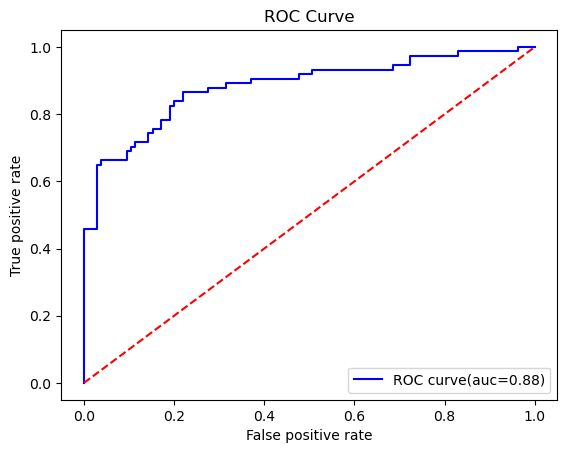

In [23]:
# roc curve
from sklearn.metrics import roc_curve,auc
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
roc_auc=auc(fpr,tpr)
# plot the curve

plt.figure()
plt.plot(fpr,tpr,color='blue',label=f'ROC curve(auc={roc_auc:.2f})')
plt.plot([0,1],[0,1],color='red',linestyle='--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [24]:
# Precision
# Defination:  The proportion of predicted positive cases that are actually positive.
# Precision = TP / (TP + FP)
# Interpretation: Of all the instances the model labeled as positive, how many were correct? (Focuses on false positives.)

# recall
# Defination: The proportion of actual positive cases that are correctly predicted.
# Recall = TP / (TP + FN)
# Interpretation: Of all the true positives in the data, how many did the model find? (Focuses on false negatives.)

In [25]:
# Cross Validation
# Cross-validation involves splitting your dataset into multiple folds (subsets),
# training the model on some folds, and testing it on the remaining fold(s).
# This process is repeated several times so that each fold gets a turn as the test set.

# Why it is important?

# Prevents Overfitting
# Better Performance Estimate
# Efficient Use of Data
# Detects Data Bias or Imbalance
